In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Исследование датасетов

### Подключаемся к бд и записываем таблицы в датафреймы

In [ ]:
conn = sqlite3.connect('/content/drive/MyDrive/dump.db')
df_mainpage = pd.read_sql_query("SELECT * FROM MainPage", conn)


df_userpath = pd.read_sql_query("SELECT * FROM UserPath", conn)


df_event_to_category = pd.read_sql_query("SELECT * FROM Event_to_Category", conn)

In [ ]:
conn.close()

### Смотрим размер датафреймов

In [ ]:
print(df_mainpage.shape)
print(df_userpath.shape)
print(df_event_to_category.shape)

(3197755, 8)
(2173020, 5)
(11590, 5)


### Избавляемся от индексов

In [ ]:
df_userpath = df_userpath.set_index('index')
df_userpath

,DeviceType,UserID,Act,EventID
index,,,,
0,mobile,6eaafef9d6c89ac6f9d894273710e623,EventShow,93617e256881c731fef1e44d75efd4a7
1,mobile,8605e22b0a4ac09565853b94dca2ac2b,EventShow,263d7f23720cb4c3e49e8f72d4da05a4
2,mobile,b725686bedb1a872bea9ab24f686f7ce,EventShow,1727bc129a45f77c44734f22a4d9ac2a
3,desktop,643c3a53efa6780bb7ff7989c4d75f02,EventShow,406d4c53608352ab96fe9757fcaeede5
4,desktop,9b933ab3010b5e8870cb7ebb36d8d9ae,SuccessPurchase,0f0e98b8568dd945a9b6cf83e36faf0c
...,...,...,...,...
2173015,mobile,05722191abebf0c176783cd44dde1dea,EventShow,0c504878166172551a30884fb5c861ff
2173016,mobile,d1fe64df1ae1d16fd341f702524859ca,EventShow,6e36189e253d509795e40326f3de70f0
2173017,mobile,4d552148e9bf754e2685f1973e36c06d,EventShow,c7e74a2cc8076162040ebc09a9a500ea


In [ ]:
df_event_to_category = df_event_to_category.set_index('index')
df_event_to_category.head()

,EventID,Type,AgeRestriction,Categories
index,,,,
0,941e1aaaba585b952b62c14a3a175a61,PAID,12,Билеты в театр им. Горького;Спектакль;Театры
1,d07e70efcfab08731a97e7b91be644de,PAID,12,Билеты в театр им. Горького;Пушкинская карта;С...
2,4c27cea8526af8cfee3be5e183ac9605,PAID,0,Билеты в театр им. Горького;Детям;Спектакль
3,92a08bf918f44ccd961477be30023da1,PAID,16,Билеты в театр им. Горького;Спектакль;Театры
4,52b738b303d90a884137546353e09ebb,PAID,16,Билеты в театр им. Горького;Спектакль;Театры


In [ ]:
df_mainpage = df_mainpage.set_index('index')
df_mainpage.head(25)

,Time,UserID,SessionID,DeviceType,Act,Block,Extra
index,,,,,,,
0,2023-11-01 01:23:35,1775075c485a3fd5892f5122916a8b21,7f0c3af1e1682aee3d77277e4f21ce1b,mobile,LoadPage,,
1,2023-11-01 01:23:35,1775075c485a3fd5892f5122916a8b21,7f0c3af1e1682aee3d77277e4f21ce1b,mobile,TopEventShow,,
2,2023-11-01 01:23:36,1775075c485a3fd5892f5122916a8b21,7f0c3af1e1682aee3d77277e4f21ce1b,mobile,ChooseDateClick,,
3,2023-11-01 01:23:38,1775075c485a3fd5892f5122916a8b21,7f0c3af1e1682aee3d77277e4f21ce1b,mobile,ChoosenDataClick,,
4,2023-11-01 01:23:41,1775075c485a3fd5892f5122916a8b21,7f0c3af1e1682aee3d77277e4f21ce1b,mobile,DataFilterApplyClick,,
5,2023-11-01 02:52:49,e9afd4828d2ebed48e11a9b175c20a08,9590f1417fed763c6d08b0eff62e799d,desktop,LoadPage,,
6,2023-11-01 02:52:49,e9afd4828d2ebed48e11a9b175c20a08,9590f1417fed763c6d08b0eff62e799d,desktop,NewsletterShow,,
7,2023-11-01 02:52:49,e9afd4828d2ebed48e11a9b175c20a08,9590f1417fed763c6d08b0eff62e799d,desktop,TopEventShow,,
8,2023-11-01 02:52:49,e9afd4828d2ebed48e11a9b175c20a08,9590f1417fed763c6d08b0eff62e799d,desktop,ExpectedEventShow,,


### Соеднияем таблицы UserPath и Event_to_Category и сохраняем в data.csv файл. Получим датасет, который можно использовать для системы рекомендаций

In [ ]:
df_merged = df_userpath.merge(df_event_to_category, left_on='EventID', right_on='EventID', how='inner')

In [ ]:
df_merged.head()

,DeviceType,UserID,Act,EventID,Type,AgeRestriction,Categories
0,mobile,6eaafef9d6c89ac6f9d894273710e623,EventShow,93617e256881c731fef1e44d75efd4a7,PAID,12,Впечатления;Встреча;Рисование
1,mobile,8605e22b0a4ac09565853b94dca2ac2b,EventShow,263d7f23720cb4c3e49e8f72d4da05a4,PAID,6,Впечатления;Детям;Концерты;Рок-музыка;Спектакл...
2,mobile,b725686bedb1a872bea9ab24f686f7ce,EventShow,1727bc129a45f77c44734f22a4d9ac2a,PAID,12,Впечатления
3,desktop,643c3a53efa6780bb7ff7989c4d75f02,EventShow,406d4c53608352ab96fe9757fcaeede5,PAID,12,Гастроли;Спектакль;Театры
4,desktop,9b933ab3010b5e8870cb7ebb36d8d9ae,SuccessPurchase,0f0e98b8568dd945a9b6cf83e36faf0c,PAID,16,Гастроли;Спектакль;Театры


In [ ]:
df_merged[df_merged['Type'] != 'PAID']

,index_x,DeviceType,UserID,Act,EventID,index_y,Type,AgeRestriction,Categories
25,26,mobile,173ebe8d0b4cc5e6c0c8b299f5d5ae7e,EventShow,84166f5167db715a139faeac60848010,8993,FREE,0,Бесплатно;Городское событие;Фестиваль
33,34,desktop,5f2ddab301872ddfc03a869a96bf9c65,EventShow,f9bb31786db6c6eca4c95ad17ae17a0d,5499,FREE,6,Бесплатно;Впечатления;Ярмарка
43,45,mobile,15506318288ae4bf46300a5825785bca,EventShow,15b94b4d1d997d082020e2480fea162f,2621,FREE,0,Бесплатно;Впечатления;Концерты
48,51,desktop,1cc6ac7b576f2da08d7c804d1f1c27bb,EventShow,bba3b8e03eb7d4b06dd576ba36ea3e50,982,FREE,16,Бесплатно;Спорт
102,106,desktop,32ddea6c76fa3e181e4b029ef88f68f8,EventShow,2e07c85fbe15c7aa685ad786f8e22aba,4472,FREE,12,Бесплатно;Детский мастер-класс;Обучение
...,...,...,...,...,...,...,...,...,...
2074528,2172994,desktop,482b7fc7a99c4b2efecc9bece81f3e70,EventShow,5c5f6f9eee122ccb7afd17a819afa44e,1566,FREE,0,Бесплатно;Кулинарный мастер-класс;Мастер-классы
2074529,2172995,mobile,15506318288ae4bf46300a5825785bca,EventShow,705885b78d1ae0cc1888e8f581965693,2299,FREE,0,Бесплатно;Йога;Спорт
2074530,2172996,desktop,883f6cf6ceea5fafbd56fb499994772f,EventShow,5117b3a7d63c9b2908df3ac35754a8d2,10137,FREE,0,Бесплатно;Соревнование;Спорт
2074546,2173012,desktop,5efc01f68510746f6bdd89cff38964e2,EventShow,7f25f709c430ea118810c179102e90c3,9743,FREE,0,Бесплатно;Городское событие;Фестиваль


In [ ]:
df_merged.to_csv('/content/drive/MyDrive/data.csv', sep=';' encoding='utf-8')

# Исследование CTR на Главной странице

## Объявляем функции для расчета статистик

### функции для подсчёта CTR

Общий CTR

In [ ]:
def calc_ctr(act, show='LoadPage', visit_extra='', visit_block='', block='', extra=''):
  page_visits = len(df_mainpage[(df_mainpage['Act'] == show) &
                                (df_mainpage['Block'].str.contains(visit_block)) &
                                (df_mainpage['Extra'].str.contains(visit_extra))]['Act'])

  clicks = len(df_mainpage[(df_mainpage['Act'] == act) &
                                (df_mainpage['Block'].str.contains(block)) &
                                (df_mainpage['Extra'].str.contains(extra))]['Act'])
  return clicks / page_visits * 100

CTR для девайса

In [ ]:
def calc_device_ctr(act, device, show='LoadPage', visit_extra='', visit_block='', block='', extra=''):
  page_visits = len(df_mainpage[(df_mainpage['Act'] == show) &
                                (df_mainpage['DeviceType'] == device) &
                                (df_mainpage['Block'].str.contains(visit_block)) &
                                (df_mainpage['Extra'].str.contains(visit_extra))]['Act'])

  clicks = len(df_mainpage[(df_mainpage['Act'] == act) &
                                (df_mainpage['DeviceType'] == device) &
                                (df_mainpage['Block'].str.contains(block)) &
                                (df_mainpage['Extra'].str.contains(extra))]['Act'])

  return clicks / page_visits * 100

CTR для mobile и CTR для desktop

In [ ]:
def calc_mobile_ctr(act, show='LoadPage', visit_extra='', visit_block='', block='', extra=''):
  return calc_device_ctr(act, 'mobile',show, visit_extra, visit_block, block, extra)

def calc_desktop_ctr(act, show='LoadPage', visit_extra='', visit_block='', block='', extra=''):
  return calc_device_ctr(act, 'desktop', show, visit_extra, visit_block, block, extra)

### Функция построения графиков

In [ ]:
def plot(act, show='LoadPage', visit_extra='', visit_block='', block='', extra=''):
  total_visits = df_mainpage[(df_mainpage['Act'] == show) &
                                (df_mainpage['Block'].str.contains(visit_block)) &
                                (df_mainpage['Extra'].str.contains(visit_extra))]

  visits = total_visits.groupby('DeviceType').size()


  total_clicks = df_mainpage[(df_mainpage['Act'] == act) &
                                (df_mainpage['Block'].str.contains(block)) &
                                (df_mainpage['Extra'].str.contains(extra))]
  clicks = total_clicks.groupby('DeviceType').size()

  ctr = (clicks / visits) * 100


  total_ctr = len(total_clicks) / len(total_visits) * 100
  overall_stats = pd.DataFrame({
    'DeviceType': ['Total'],
    'TotalClicks': [len(total_clicks)],
    'CTR': [total_ctr]})

  stats_df = pd.DataFrame({
    'DeviceType': visits.index,
    'TotalVisits': visits.values,
    'TotalClicks': clicks.values,
    'CTR': ctr.values})

  stats_df = pd.concat([stats_df, overall_stats])
  # total clicks info
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  sns.barplot(x='DeviceType', y='TotalClicks', data=stats_df)
  plt.title(f'Total {act} Clicks by Device Type')
  plt.ylabel('Number of Clicks')
  plt.xlabel('Device Type')

  # CTR info
  plt.subplot(1, 2, 2)
  sns.barplot(x='DeviceType', y='CTR', data=stats_df)
  plt.title(f'{act} CTR by Device Type')
  plt.ylabel('CTR (%)')
  plt.xlabel('Device Type')

  plt.tight_layout()
  plt.show()


Вывод статистика

In [ ]:
def show_info(act, show='LoadPage', visit_extra='', visit_block='', block='', extra=''):
  print(f'общий CTR для {act} = {calc_ctr(act, show, visit_extra, visit_block, block, extra):.2f}%')
  print(f'CTR для {act} на mobile = {calc_mobile_ctr(act, show, visit_extra, visit_block, block, extra):.2f}%')

  print(f'CTR для {act} на desktop  = {calc_desktop_ctr(act, show, visit_extra, visit_block, block, extra):.2f}%')

  plot(act, show=show, visit_extra=visit_extra, visit_block=visit_block, block=block, extra=extra)

## Считаем CTR и строим графики по кликам

### SecondLogoClick

общий CTR для SecondLogoClick = 0.08%
CTR для SecondLogoClick на mobile = 0.01%
CTR для SecondLogoClick на desktop  = 0.24%


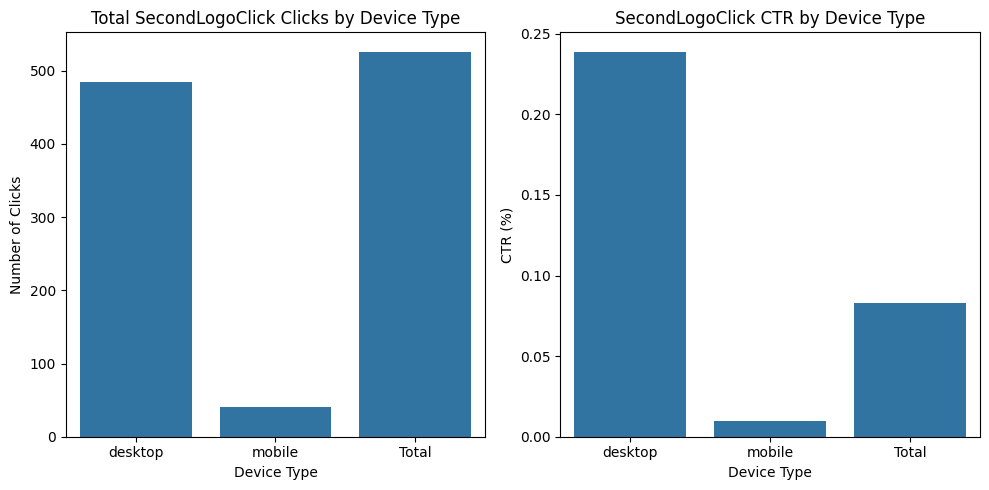

In [ ]:
show_info("SecondLogoClick")

### EventsShowClick

общий CTR для EventsShowClick = 2.34%
CTR для EventsShowClick на mobile = 2.86%
CTR для EventsShowClick на desktop  = 1.25%


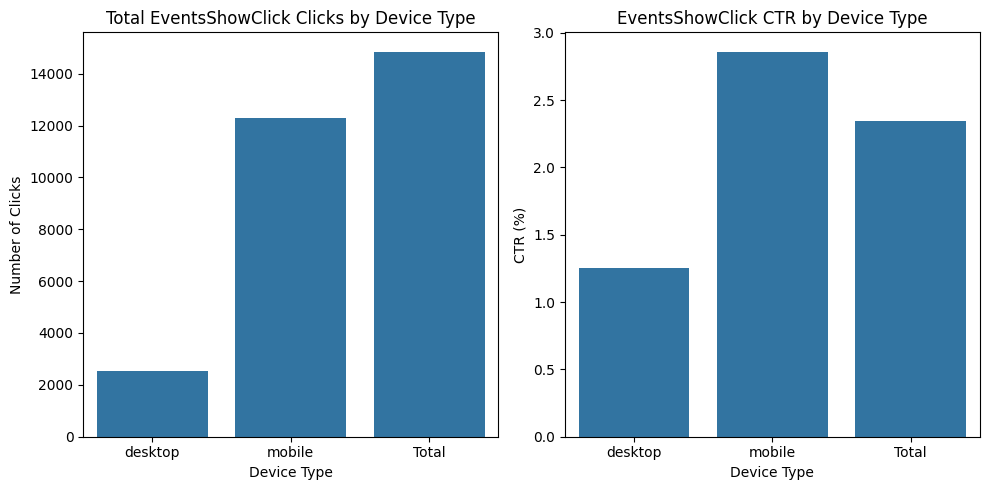

In [ ]:
show_info("EventsShowClick")

### BuyClick

#### BuyClick в популярных

общий CTR для BuyClick = 1.26%
CTR для BuyClick на mobile = 1.21%
CTR для BuyClick на desktop  = 1.38%


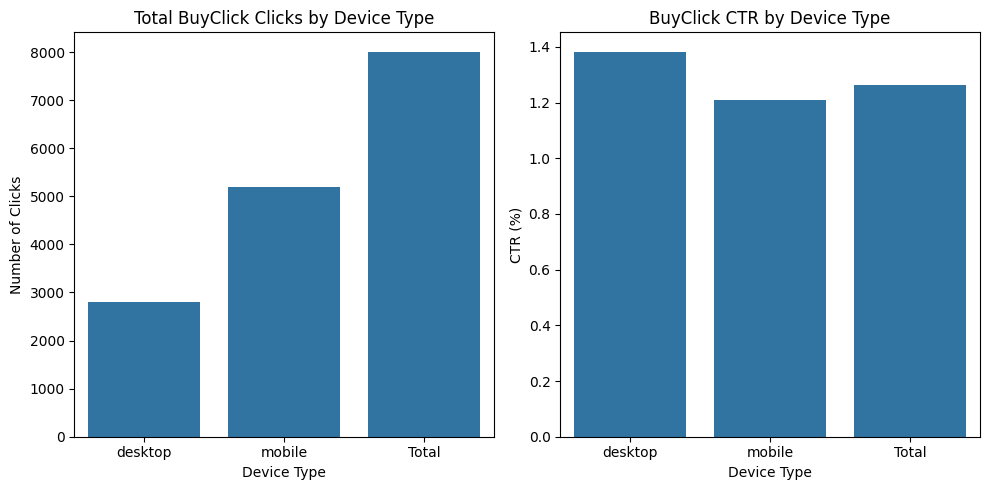

In [ ]:
block = df_mainpage[df_mainpage['Act'] == 'BuyClick']['Block'].unique()[0]
show_info("BuyClick", block=block)

#### BuyClick

общий CTR для BuyClick = 0.73%
CTR для BuyClick на mobile = 0.37%
CTR для BuyClick на desktop  = 1.48%


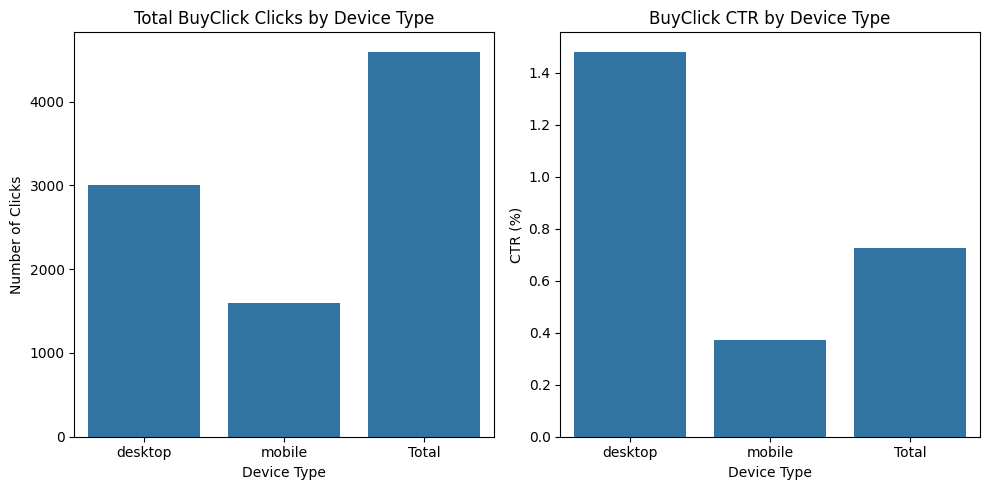

In [ ]:
extra = df_mainpage[df_mainpage['Act'] == 'BuyClick']['Extra'].unique()[1].split('=')[0]
show_info("BuyClick", extra=extra)

### KinoShow

общий CTR для KinoShow = 10.22%
CTR для KinoShow на mobile = 7.99%
CTR для KinoShow на desktop  = 14.96%


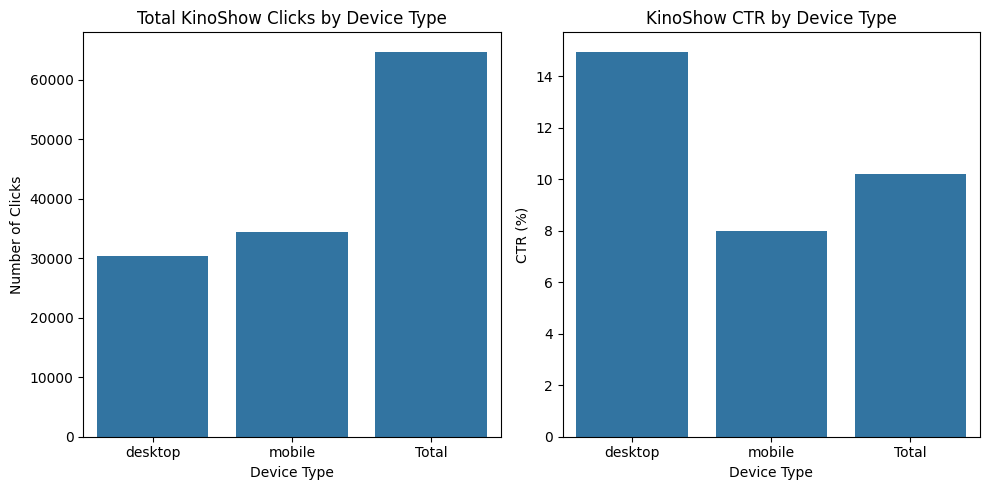

In [ ]:
show_info("KinoShow")

Метод выглядит не очень эффективным.

## Построим график по сгруппированным данным

Сгрупируем действия связанные с кликами

In [ ]:
df = df_mainpage[(~df_mainpage['Block'].isna()) & (~df_mainpage['Extra'].isna())]
df['Act'] = df['Act'].fillna('')
clicks = df[df['Act'].str.contains('Click')].groupby(['DeviceType', 'Act', 'Block', 'Extra']).size().reset_index(name='Clicks')

Считаем количество загруженных главных страниц

In [ ]:
total_visited = len(df[df['Act'] == 'LoadPage'])

In [ ]:
visits = df[~df['Act'].str.contains('Click')].groupby(['DeviceType', 'Act', 'Block', 'Extra']).size().reset_index(name='Clicks')
mobile_visits = visits[(visits['Act'] == 'LoadPage') & (visits['DeviceType'] == 'mobile')]['Clicks'].squeeze()
desktop_visits = visits[(visits['Act'] == 'LoadPage') & (visits['DeviceType'] == 'desktop')]['Clicks'].squeeze()

### Рисуем график количества кликов на разных девайсах

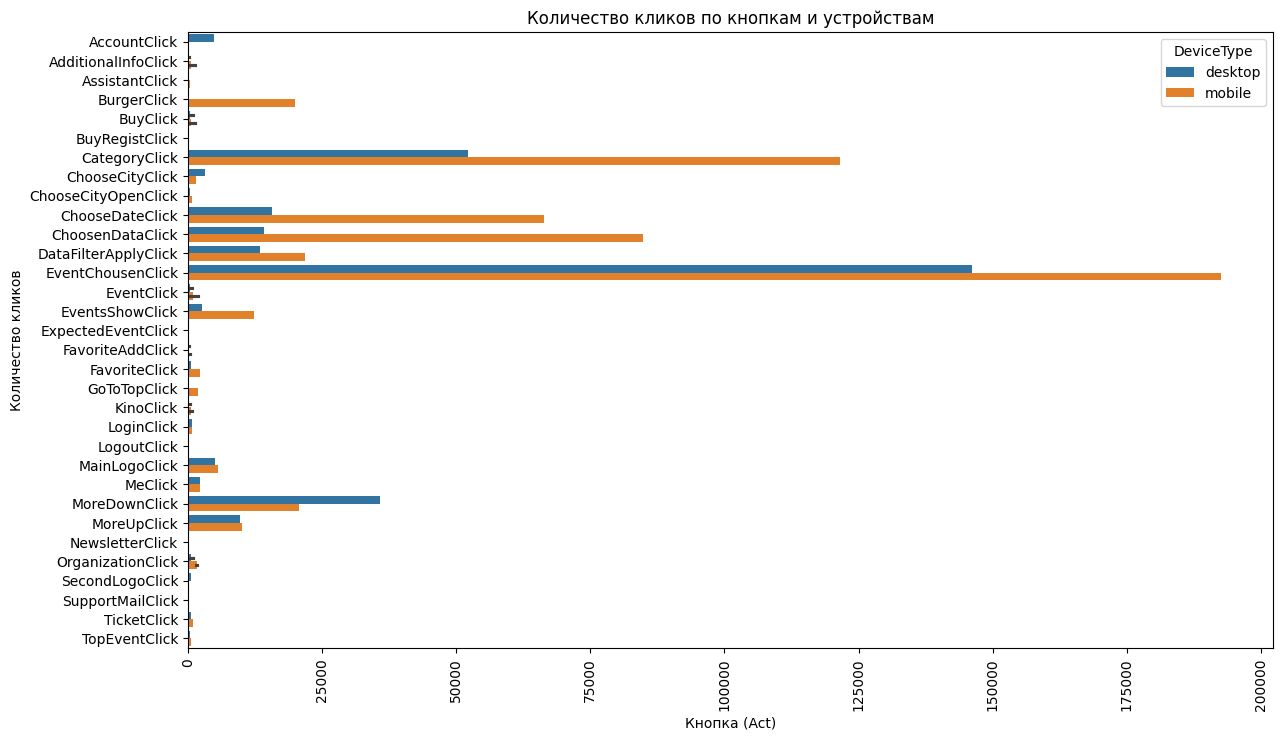

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(y='Act', x='Clicks', hue='DeviceType', data=clicks)
plt.xticks(rotation=90)
plt.title('Количество кликов по кнопкам и устройствам')
plt.ylabel('Количество кликов')
plt.xlabel('Кнопка (Act)')
plt.show()

### Считаем CTR и строим график

In [ ]:
clicks.loc[clicks['DeviceType'] == 'mobile','CTR'] = (clicks[clicks['DeviceType'] == 'mobile']['Clicks'] / mobile_visits) * 100
clicks.loc[clicks['DeviceType'] == 'desktop','CTR'] = (clicks[clicks['DeviceType'] == 'desktop']['Clicks'] / desktop_visits) * 100

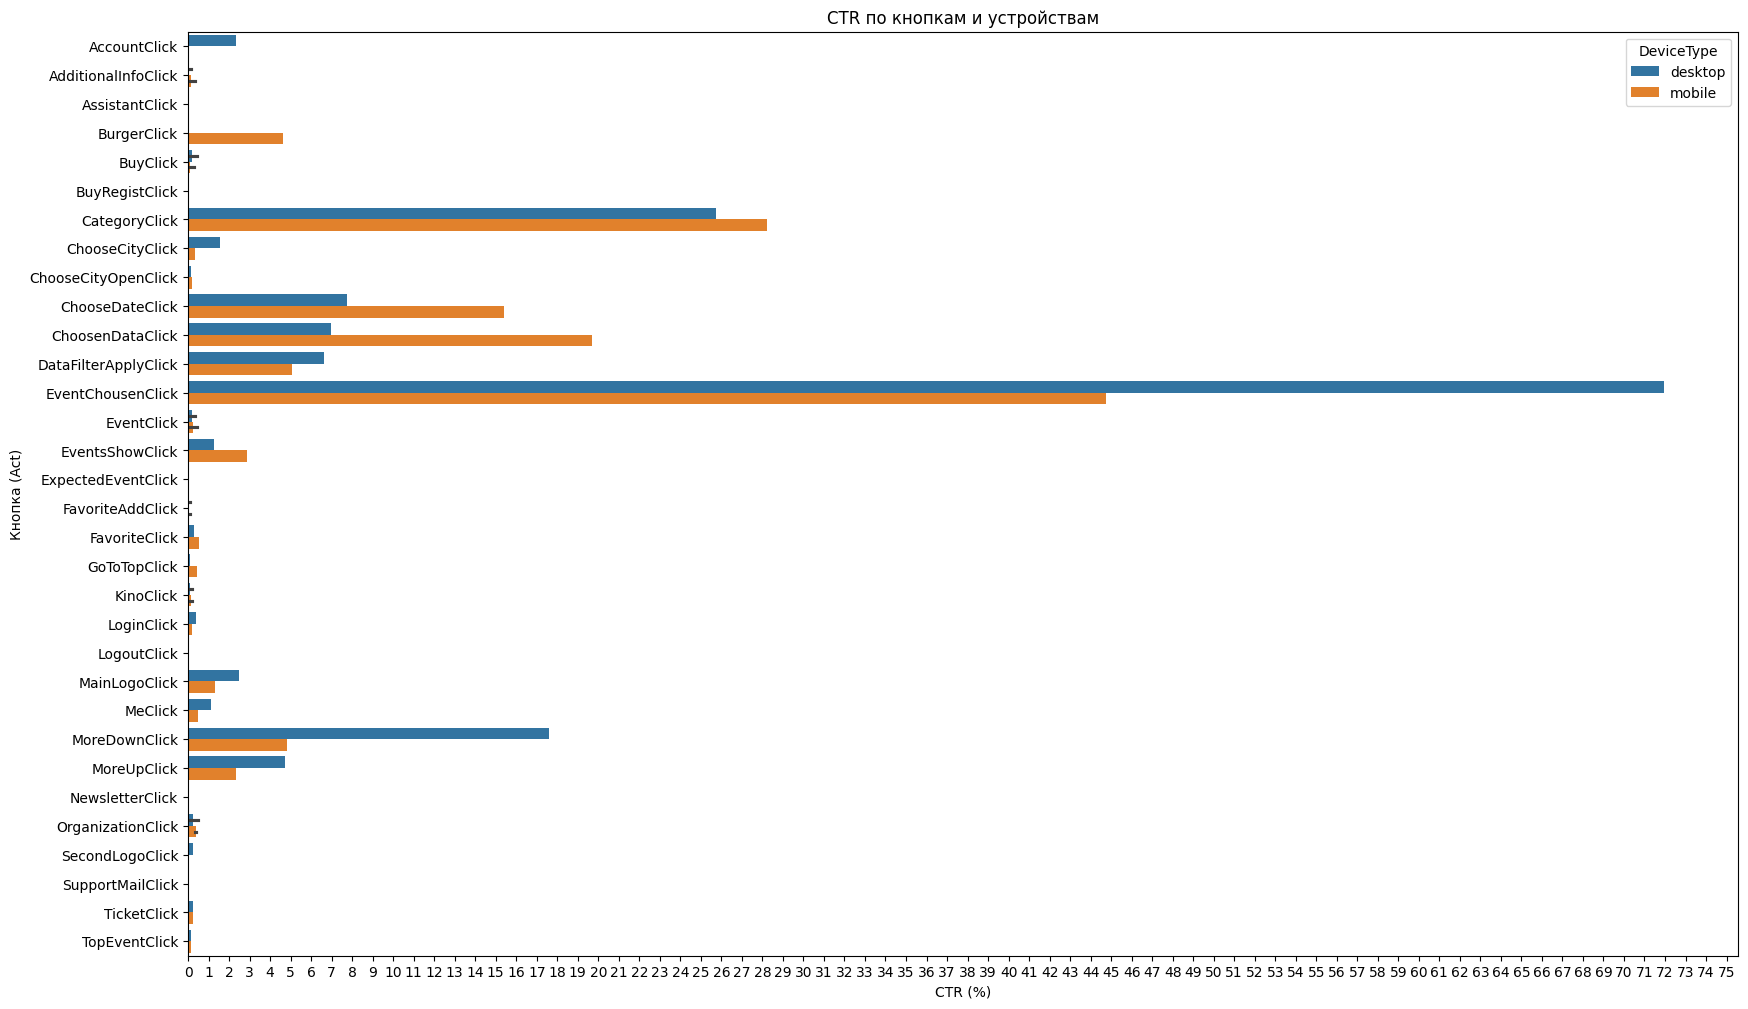

In [ ]:
plt.figure(figsize=(20, 12))
sns.barplot(y='Act', x='CTR', hue='DeviceType', data=clicks)
plt.gca().xaxis.set_major_locator(MultipleLocator(1))

plt.title('CTR по кнопкам и устройствам')
plt.xlabel('CTR (%)')
plt.ylabel('Кнопка (Act)')
plt.show()

сделаем замену пустных строк

In [ ]:
clicks.loc[(clicks['Block'] == ''), 'Block'] = 'NoBlock'
clicks.loc[(clicks['Extra'] == ''), 'Extra'] = 'NoExtra'

### Строим график для событий, которым не нужны клики

In [ ]:
other_events = df[~df['Act'].str.contains('Click')].groupby(['DeviceType', 'Act', 'Block', 'Extra']).size().reset_index(name='Clicks')

other_events.loc[other_events['DeviceType'] == 'mobile','CTR'] = (other_events[other_events['DeviceType'] == 'mobile']['Clicks'] / mobile_visits) * 100

other_events.loc[other_events['DeviceType'] == 'desktop','CTR'] = (other_events[other_events['DeviceType'] == 'desktop']['Clicks'] / desktop_visits) * 100

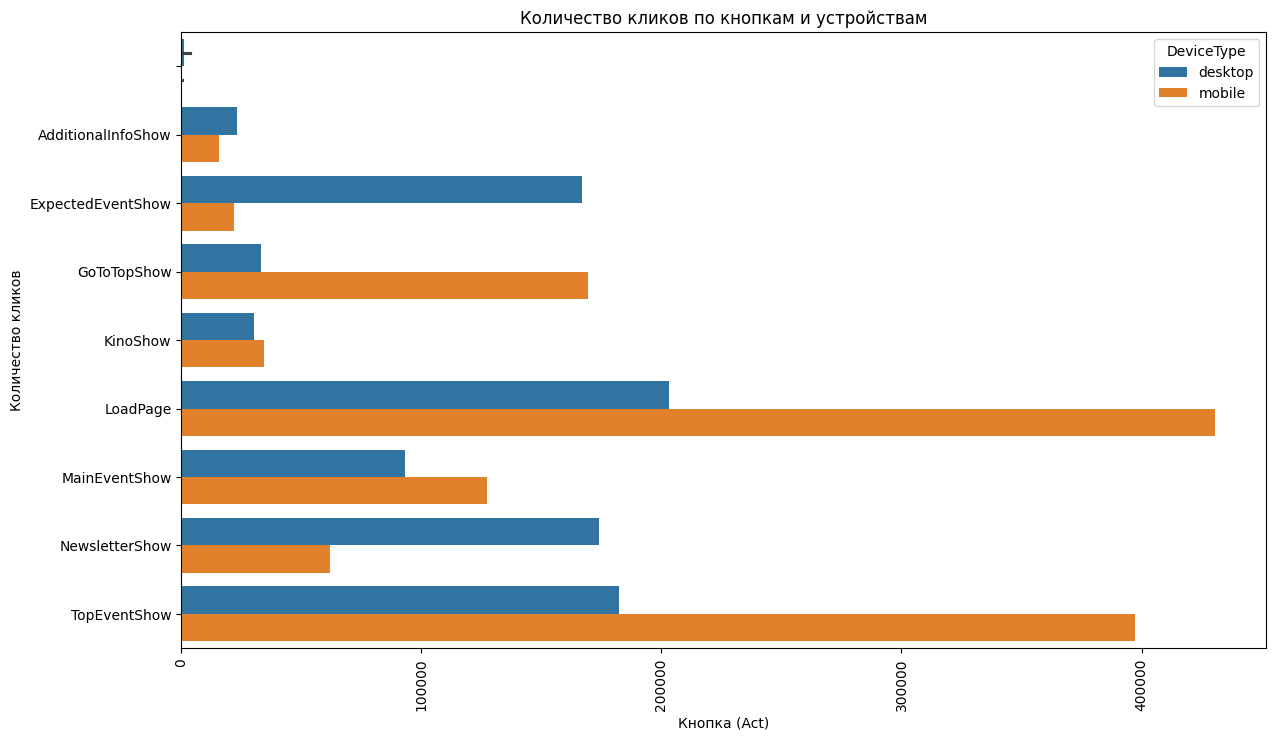

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(y='Act', x='Clicks', hue='DeviceType', data=other_events)
plt.xticks(rotation=90)
plt.title('Количество кликов по кнопкам и устройствам')
plt.ylabel('Количество кликов')
plt.xlabel('Кнопка (Act)')
plt.show()

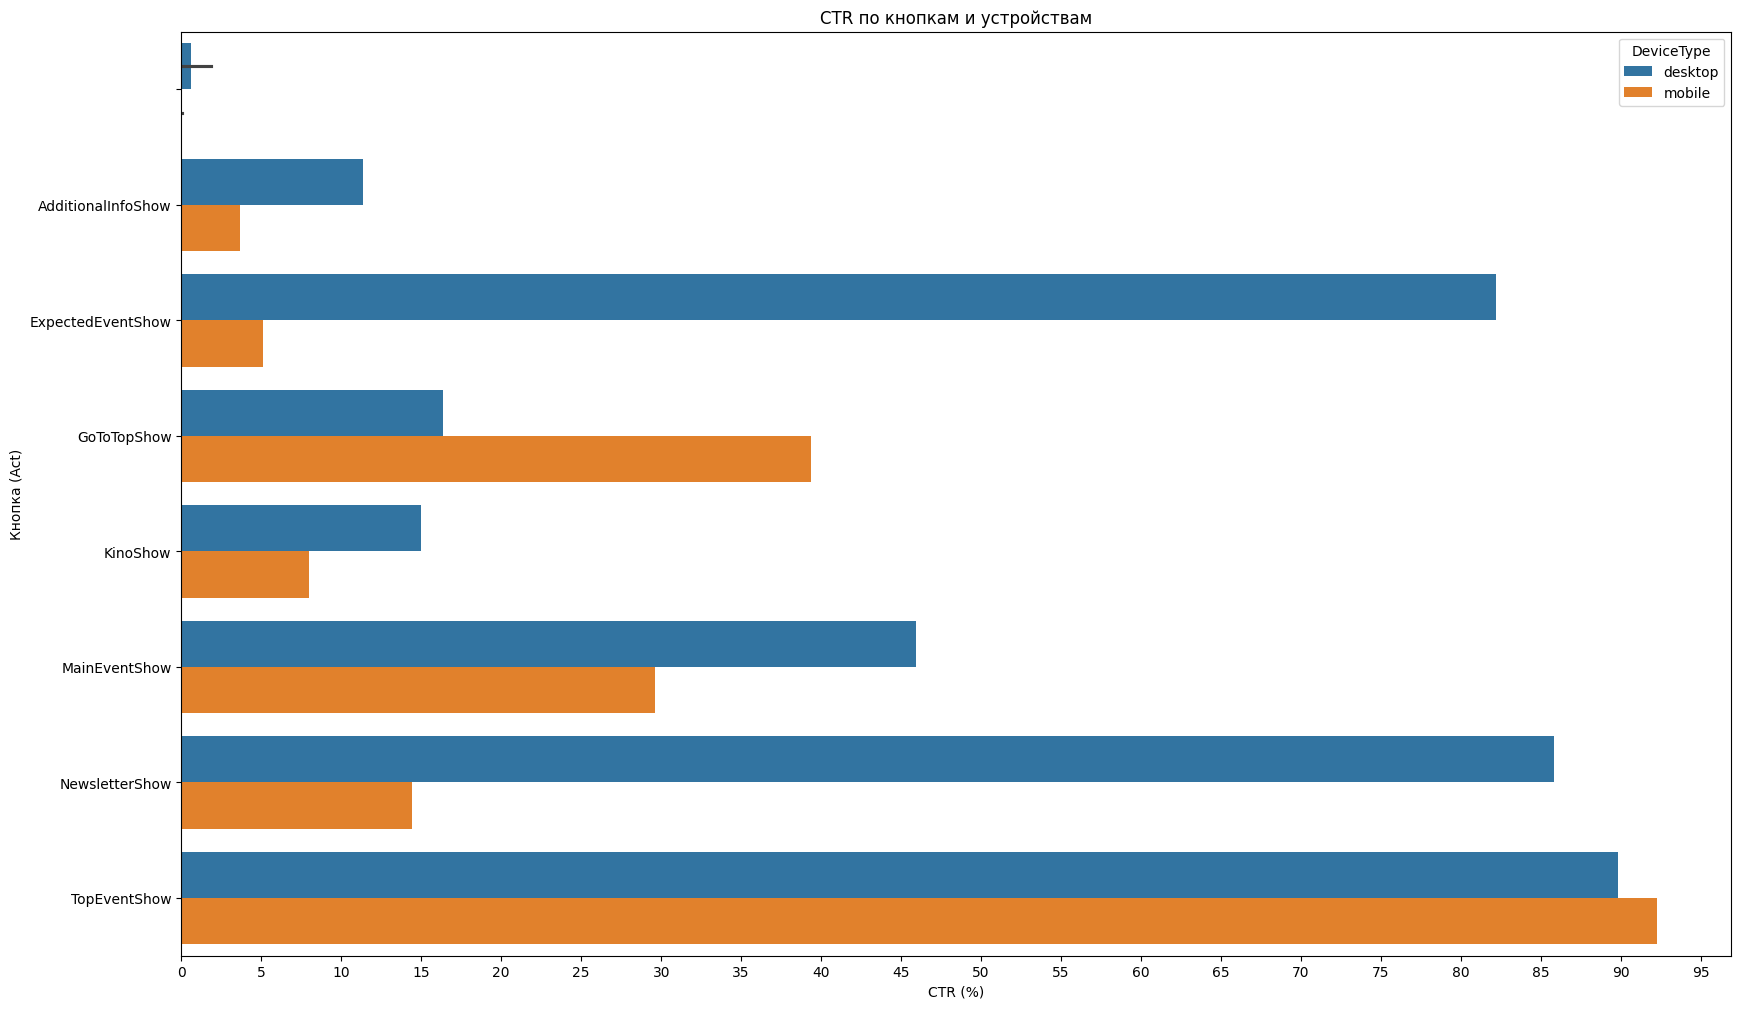

In [ ]:
plt.figure(figsize=(20, 12))
sns.barplot(y='Act', x='CTR', hue='DeviceType', data=other_events[other_events['Act'] != 'LoadPage'])
plt.gca().xaxis.set_major_locator(MultipleLocator(5))

plt.title('CTR по кнопкам и устройствам')
plt.xlabel('CTR (%)')
plt.ylabel('Кнопка (Act)')
plt.show()

### Посмотрим на EventChousenClick

    DeviceType                Act    Block    Extra  Clicks        CTR
35     desktop  EventChousenClick  NoBlock  NoExtra  146063  71.962143
176     mobile  EventChousenClick  NoBlock  NoExtra  192632  44.753698


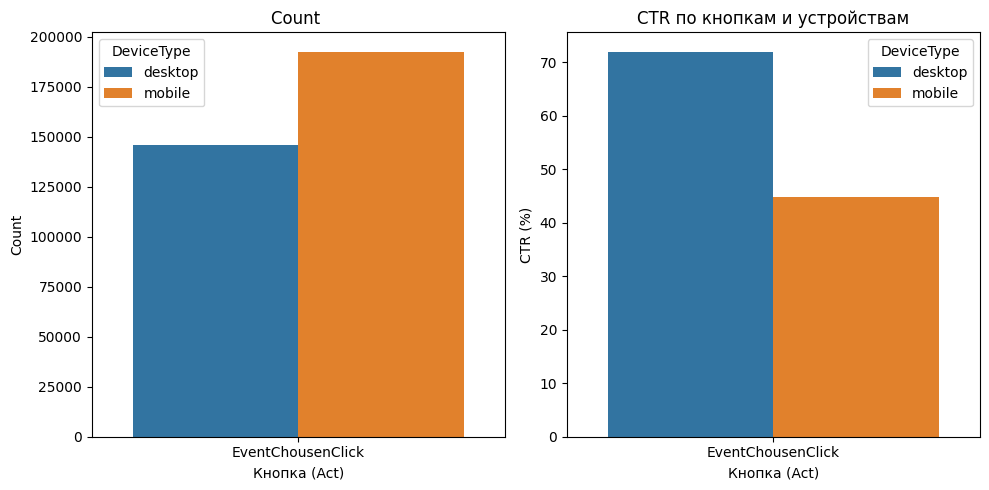

In [ ]:
event_chousen_info = clicks[clicks['Act'] == 'EventChousenClick']
print(event_chousen_info)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Act', y='Clicks', hue='DeviceType', data=event_chousen_info)

plt.title('Count ')
plt.ylabel('Count')
plt.xlabel('Кнопка (Act)')

plt.subplot(1, 2, 2)
sns.barplot(x='Act', y='CTR', hue='DeviceType', data=event_chousen_info)

plt.title('CTR по кнопкам и устройствам')
plt.ylabel('CTR (%)')
plt.xlabel('Кнопка (Act)')

plt.tight_layout()
plt.show()

Дополнительно информации кроме девайса нет

### Выведем информацию о FavoriteAdddClick

#### По DeviceType

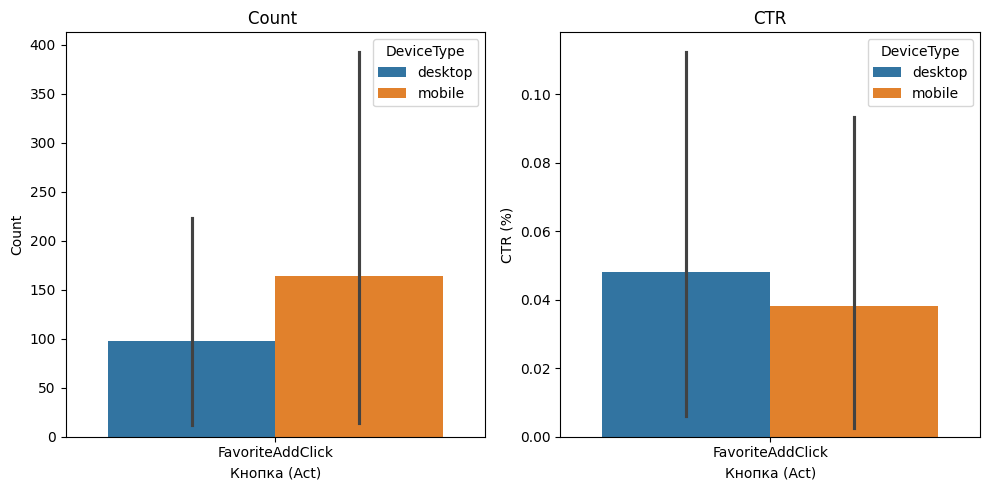

In [ ]:
favorite_info = clicks[clicks['Act'] == 'FavoriteAddClick']
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Act', y='Clicks', hue='DeviceType', data=favorite_info)

plt.title('Count ')
plt.ylabel('Count')
plt.xlabel('Кнопка (Act)')

plt.subplot(1, 2, 2)
sns.barplot(x='Act', y='CTR', hue='DeviceType', data=favorite_info)

plt.title('CTR')
plt.ylabel('CTR (%)')
plt.xlabel('Кнопка (Act)')

plt.tight_layout()
plt.show()

#### По Block

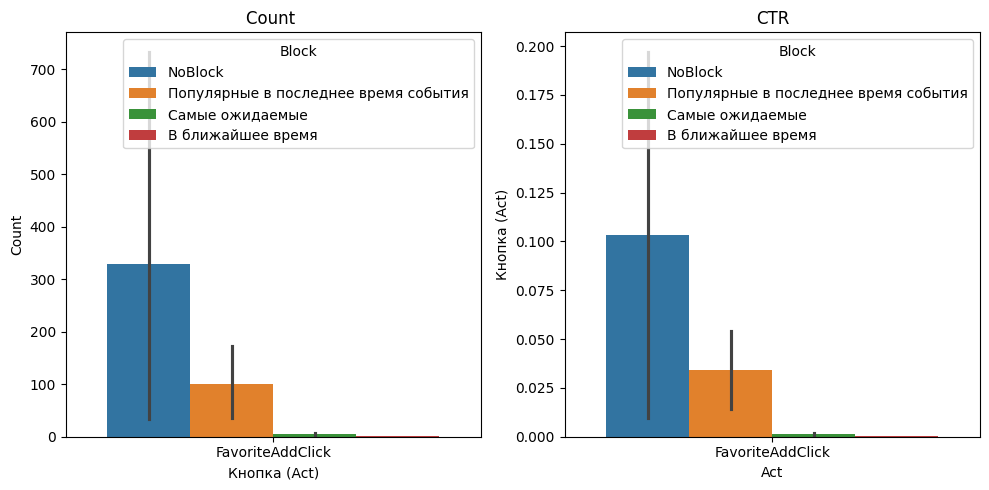

In [ ]:
favorite_info = clicks[clicks['Act'] == 'FavoriteAddClick']
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Act', y='Clicks', hue='Block', data=favorite_info)

plt.title('Count ')
plt.ylabel('Count')
plt.xlabel('Кнопка (Act)')

plt.subplot(1, 2, 2)
sns.barplot(x='Act', y='CTR', hue='Block', data=favorite_info)

plt.title('CTR')
plt.ylabel('CTR (%)')
plt.ylabel('Кнопка (Act)')

plt.tight_layout()
plt.show()


### Рассмотрим кнопку EventClick

In [ ]:
event_info = clicks[clicks['Act'] == 'EventClick']

#### EventClick по DeviceType

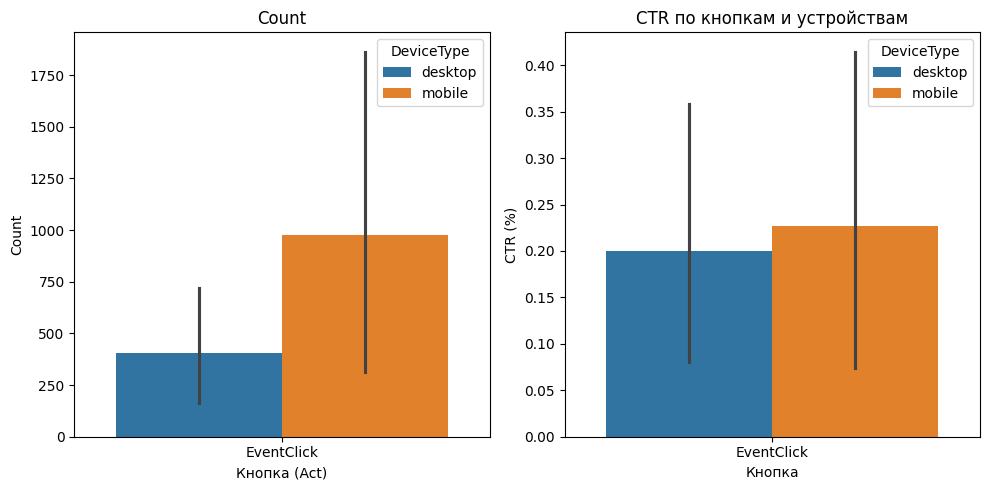

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Act', y='Clicks', hue='DeviceType', data=event_info)

plt.title('Count')
plt.ylabel('Count')
plt.xlabel('Кнопка (Act)')

plt.subplot(1, 2, 2)
sns.barplot(x='Act', y='CTR', hue='DeviceType', data=event_info)

plt.title('CTR по кнопкам и устройствам')
plt.ylabel('CTR (%)')
plt.xlabel(f'Кнопка')

plt.tight_layout()
plt.show()

#### EventClick по Block

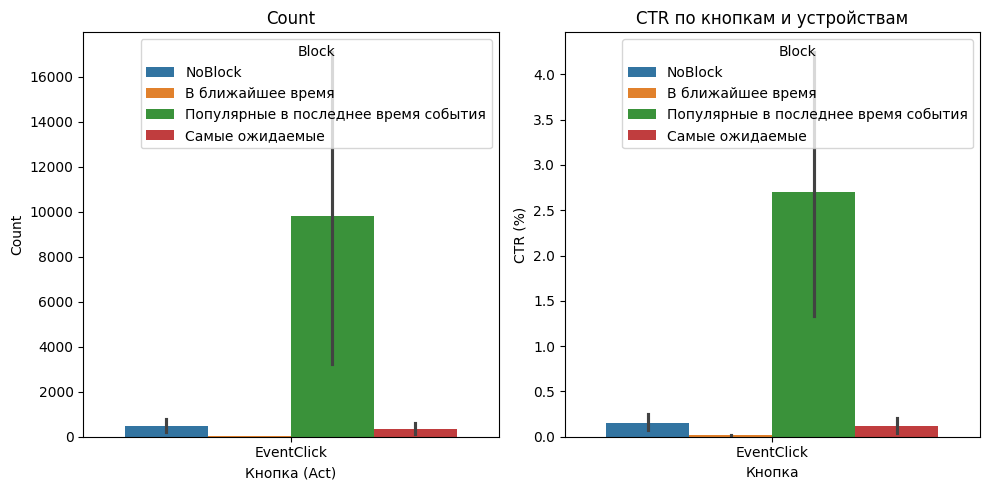

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Act', y='Clicks', hue='Block', data=event_info)

plt.title('Count')
plt.ylabel('Count')
plt.xlabel('Кнопка (Act)')

plt.subplot(1, 2, 2)
sns.barplot(x='Act', y='CTR', hue='Block', data=event_info)

plt.title('CTR по кнопкам и устройствам')
plt.ylabel('CTR (%)')
plt.xlabel(f'Кнопка')

plt.tight_layout()
plt.show()

In [ ]:
event_info.loc[:, 'Extra'] = event_info['Extra'].str.replace(r'PageIndex=\d+','PageIndex', regex=True).str.replace(r'ClickType=(\w+)', r'\1', regex=True).str.replace(r'BlockType=(\w+)', r'\1', regex=True)

#### EventClick по Extra

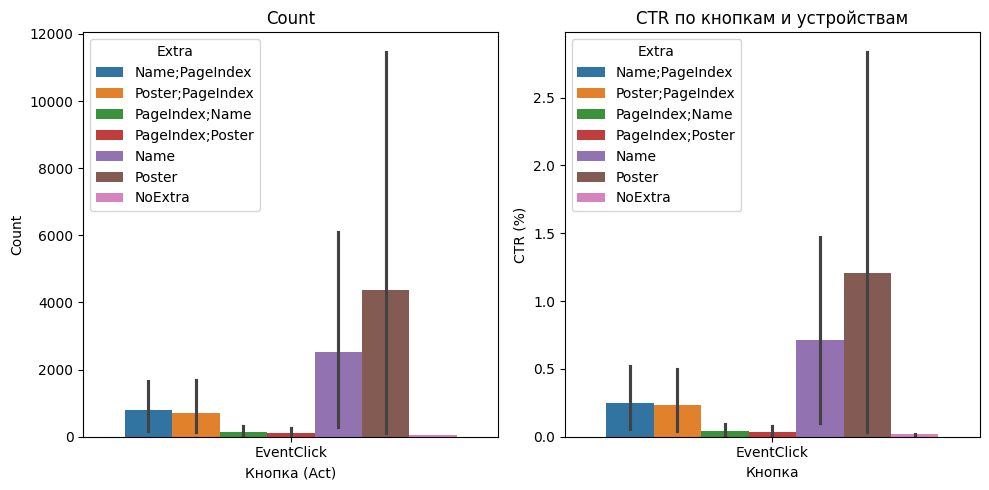

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Act', y='Clicks', hue='Extra', data=event_info)

plt.title('Count')
plt.ylabel('Count')
plt.xlabel('Кнопка (Act)')

plt.subplot(1, 2, 2)
sns.barplot(x='Act', y='CTR', hue='Extra', data=event_info)

plt.title('CTR по кнопкам и устройствам')
plt.ylabel('CTR (%)')
plt.xlabel(f'Кнопка')

plt.tight_layout()
plt.show()

### AdditionalInfo

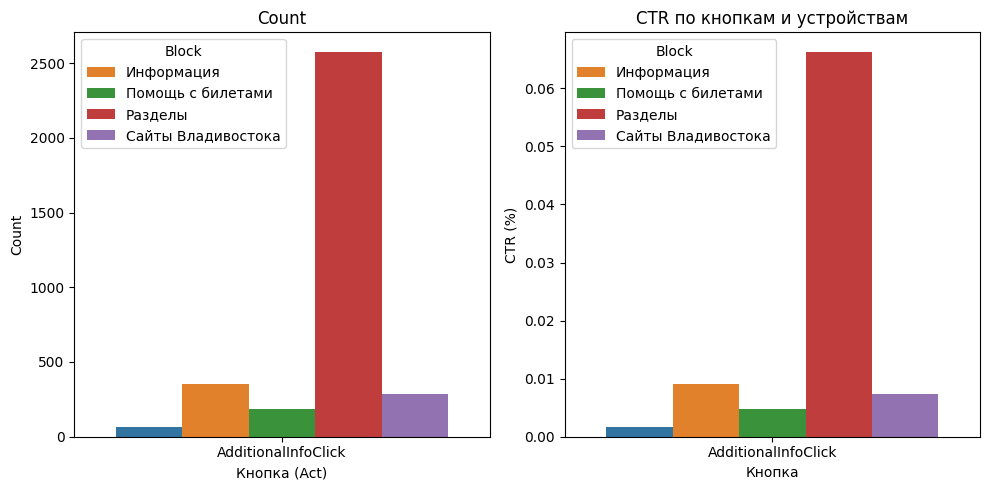

In [ ]:
add_click = df[df["Act"].str.contains("AdditionalInfo")].groupby(["Act", "Block"]).size().reset_index(name='Clicks')
add_click["CTR"] = add_click["Clicks"] / add_click[add_click["Act"] == "AdditionalInfoShow"]["Clicks"].max()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Act', y='Clicks', hue='Block', data=add_click[:-1])

plt.title('Count')
plt.ylabel('Count')
plt.xlabel('Кнопка (Act)')

plt.subplot(1, 2, 2)
sns.barplot(x='Act', y='CTR', hue='Block', data=add_click[:-1])

plt.title('CTR по кнопкам и устройствам')
plt.ylabel('CTR (%)')
plt.xlabel(f'Кнопка')

plt.tight_layout()
plt.show()

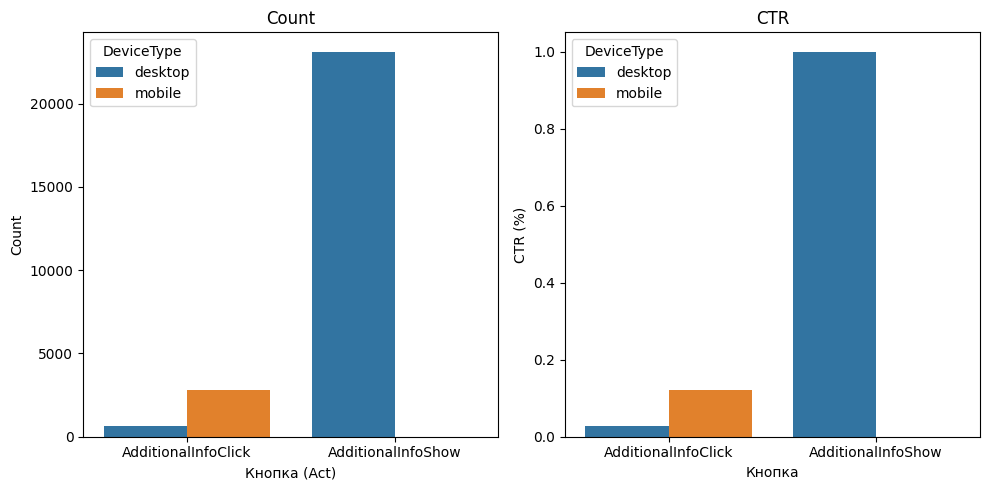

In [ ]:
add_click = df[df["Act"].str.contains("AdditionalInfo")].groupby(["Act", "DeviceType"]).size().reset_index(name='Clicks')
add_click["CTR"] = add_click["Clicks"] / add_click[add_click["Act"] == "AdditionalInfoShow"]["Clicks"].max()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Act', y='Clicks', hue='DeviceType', data=add_click[:-1])

plt.title('Count')
plt.ylabel('Count')
plt.xlabel('Кнопка (Act)')

plt.subplot(1, 2, 2)
sns.barplot(x='Act', y='CTR', hue='DeviceType', data=add_click[:-1])

plt.title('CTR')
plt.ylabel('CTR (%)')
plt.xlabel(f'Кнопка')

plt.tight_layout()
plt.show()

# Дополнительны метрики

## Bounce Rate

По данным первые 2-3 события автоматические

In [ ]:
session_acts = df.groupby('SessionID')['Act'].nunique()
bounces = session_acts[session_acts <= 3].count()
total_sessions = df['SessionID'].nunique()
bounce_rate = (bounces / total_sessions) * 100
print(f"Bounce Rate: {bounce_rate:.2f}%")

Bounce Rate: 27.41%


## Conversion Rate

### Для кнопки BuyClick

Для популярных

In [ ]:
conversion_sessions = df[(df['Act'] == 'BuyClick') & (df['Block'] != '')]['SessionID'].nunique()
conversion_rate = (conversion_sessions / total_sessions) * 100
print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 1.47%


Для обычных

In [ ]:
conversion_sessions = df[(df['Act'] == 'BuyClick') & (df['Block'] == '')]['SessionID'].nunique()
conversion_rate = (conversion_sessions / total_sessions) * 100
print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 0.67%


Общий

In [ ]:
conversion_sessions = df[(df['Act'] == 'BuyClick')]['SessionID'].nunique()
conversion_rate = (conversion_sessions / total_sessions) * 100
print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 2.01%


### BuyRegistClick

In [ ]:
conversion_sessions = df[(df['Act'] == 'BuyRegistClick')]['SessionID'].nunique()
conversion_rate = (conversion_sessions / total_sessions) * 100
print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 0.07%


##  Time on Page

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])
session_times = df.groupby('SessionID').agg(
    session_start=('Time', 'min'),
    session_end=('Time', 'max')
)
session_times['time_on_page'] = (session_times['session_end'] - session_times['session_start']).dt.total_seconds()
avg_time_on_page = session_times['time_on_page'].mean()
med_time_on_page = session_times['time_on_page'].median()
print(f"Среднее время на странице: {avg_time_on_page / 60:.2f} минут")
print(f"Медианное время на странице: {med_time_on_page / 60:.2f} минут")

Среднее время на странице: 4.37 минут
Медианное время на странице: 0.25 минут


# Отчёт

Больше всего действий пользователи совершают на мобильных устройствах

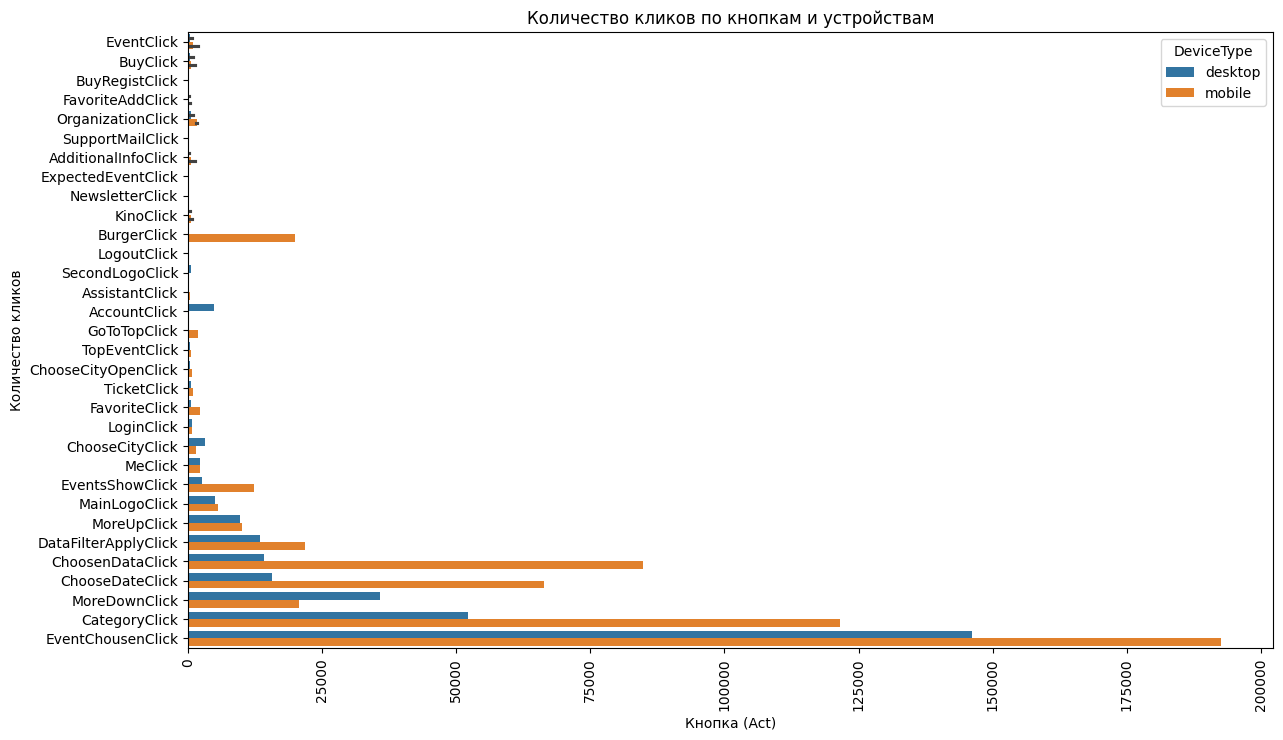

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(y='Act', x='Clicks', hue='DeviceType', data=clicks.sort_values('Clicks'))
plt.xticks(rotation=90)
plt.title('Количество кликов по кнопкам и устройствам')
plt.ylabel('Количество кликов')
plt.xlabel('Кнопка (Act)')
plt.show()

По графику можно заметить, что пользователи не почти не используют аккаунт, особенно на мобильных устройствах, а так же предпочитают скролить вниз на десктопе. Так же множество вспомогательных кнопок используются очень мало

Посмотрим на график CTR по устройствам

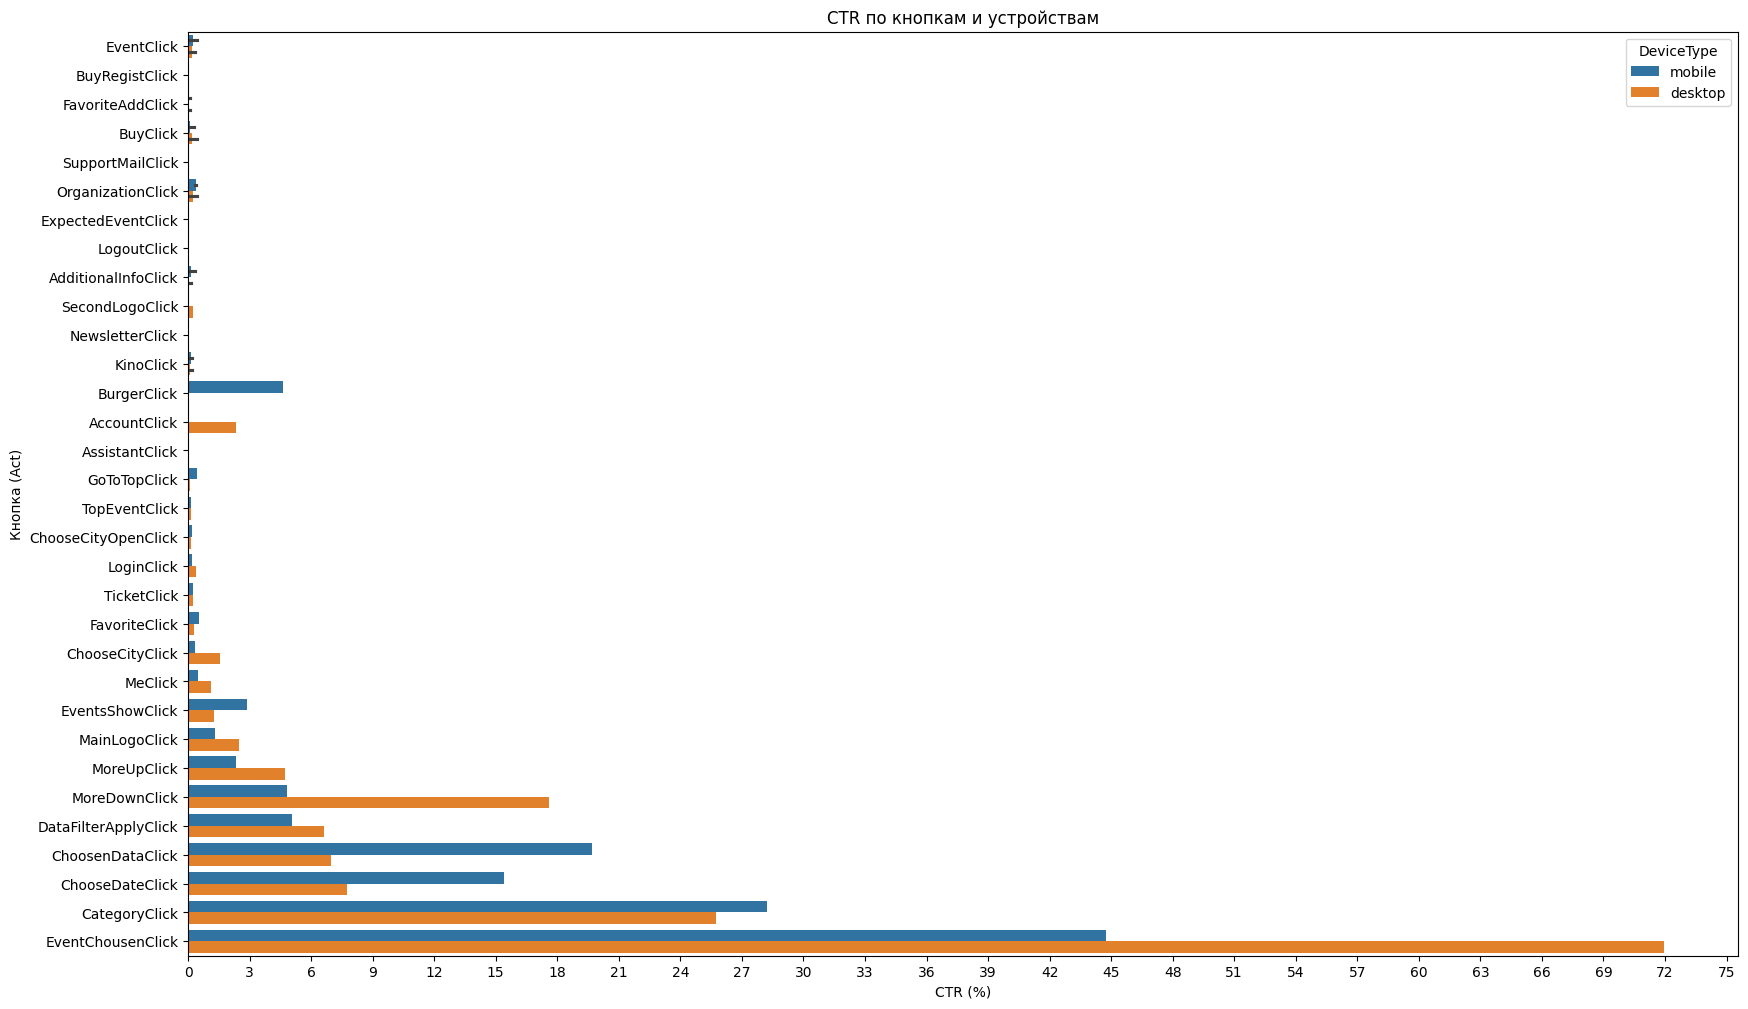

In [ ]:
plt.figure(figsize=(20, 12))
sns.barplot(y='Act', x='CTR', hue='DeviceType', data=clicks.sort_values('CTR'))
plt.gca().xaxis.set_major_locator(MultipleLocator(3))

plt.title('CTR по кнопкам и устройствам')
plt.xlabel('CTR (%)')
plt.ylabel('Кнопка (Act)')
plt.show()

### Выводы

1. По графику можно сделать выводы что EventChousenClick CategoryClick сделаны достаточно успешно

---

2. Стоит уменьшить количество событий в списке, до нажатия кнопки EventsShowClick

---

3. Стоит переработать объект EventClick. На объявления кликают очень редко. Так же пользователи чаще всего кликают по постеру и немного реже по названию события. Чаще всего кликают по событиям во вкладке Популярные события

---

4. Скорее всего пользвотали не ищут очень глубоко события. Медианное Time on page подтверджает это. Кнопка GoToTop так же говорит об этом
---

5. BuyClick: конверстация в нажатия кнопки 2%. Стоит сделать изменения.
---
6. BounceRate = 27%. Что нормально но можно сделать улучшения
---
7. У всех кнопок с CTR < 1% стоит проверить важность, а так же стоит их изменить и провести A/B тест